In [121]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [122]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [123]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
data = data.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [125]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [126]:
from matplotlib import pyplot as plt
import seaborn as sns

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [128]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [129]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [130]:
data.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

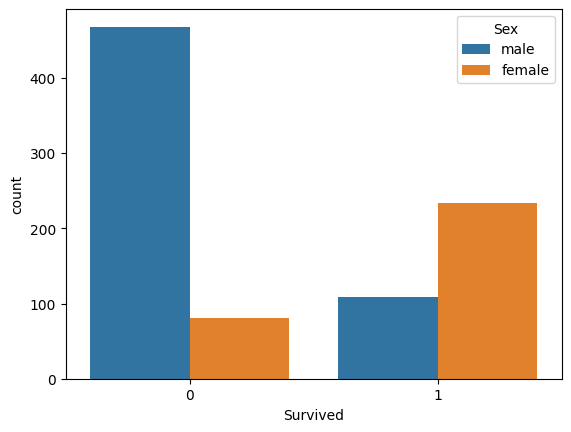

In [131]:
sns.countplot(data=data, x='Survived', hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

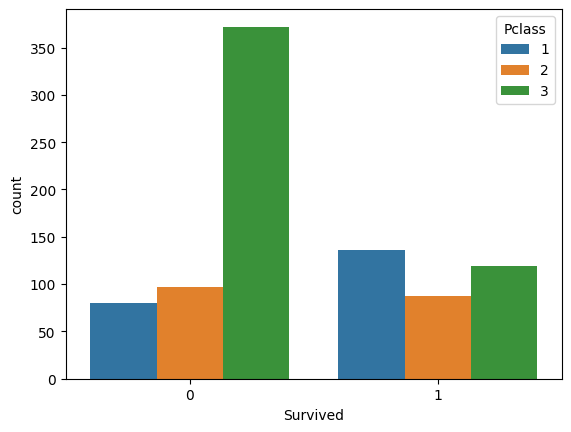

In [132]:
sns.countplot(data=data, x='Survived', hue='Pclass')

In [133]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Age', ylabel='Count'>

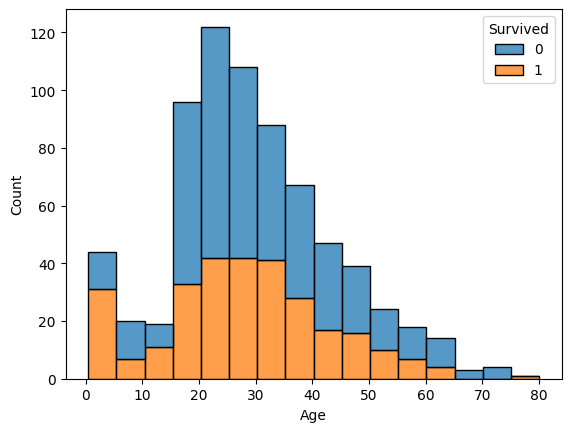

In [134]:
sns.histplot(data=data, x="Age", hue="Survived", bins=16, kde=False, multiple="stack")

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [136]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, RobustScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def filtercabin(data):
    data = data.copy()
    data['Cabin'] = data[~data['Cabin'].isna()]['Cabin'].apply(lambda x : str(x)[0])

    return data

def title(df):
    # Extract titles
    df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

    # Standardize titles
    title_mapping = {'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'}
    df['Title'] = df['Title'].replace(title_mapping)

    # Create mask for title replacement
    title_mask = ~df['Title'].isin(['Mr', 'Miss', 'Mrs', 'Master'])

    df.loc[title_mask, 'Title'] = df.loc[title_mask, 'Sex'].map({'male': 'Mr', 'female': 'Mrs'})

    return df.drop('Name', axis=1)

def imputer(data):
    #Imputing NumFeatures
    imputer = SimpleImputer(strategy='mean')
    data[['Fare']] = imputer.fit_transform(data[['Fare']])

    #Imputing CatFeatures
    imputer = SimpleImputer(strategy='most_frequent')
    data[['Embarked', 'Parch', 'SibSp', 'Pclass', 'Sex']] = imputer.fit_transform(data[['Embarked', 'Parch', 'SibSp', 'Pclass', 'Sex']])

    #Imputing Cabin
    imputer = SimpleImputer(strategy='constant', fill_value='missing')
    data[['Cabin']] = imputer.fit_transform(data[['Cabin']])

    #Imputing Age
    temp = data.groupby('Title')['Age'].mean().to_dict()
    mask = data['Age'].isnull()
    data.loc[mask, 'Age'] = data.loc[mask, 'Title'].map(temp)

    return data

def newfeat(data):
    data['Age*Class'] = data['Age'] * data['Pclass']
    data['Age*Fare'] = data['Age'] * data['Fare']
    data['Alone'] = np.where((data['SibSp'] > 0) | (data['Parch'] > 0), True, False)
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

    return data

def age_numtocat(data):
    data['Age'] = pd.cut(data['Age'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80], right=False)
    return data


Encoder = ColumnTransformer(
    [
        ('Encoder', OneHotEncoder(handle_unknown='ignore'), ['Embarked', 'Parch', 'SibSp', 'Sex', 'Pclass', 'Age', 'Alone', 'Title']),
        ('Cabin_Encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['Cabin']),
        ('Scaler', RobustScaler(), ['Fare', 'Age*Class', 'Age*Fare', 'FamilySize'])
    ],
    remainder='passthrough'
)

clf_pipeline = Pipeline(
    [
        ('FilterCabin', FunctionTransformer(filtercabin)),
        ('Title', FunctionTransformer(title)),
        ('Imputer', FunctionTransformer(imputer)),
        ('NewFeat', FunctionTransformer(newfeat)),
        ('age_numtocat', FunctionTransformer(age_numtocat)),
        ('Encoder', Encoder),
        ('Model', RandomForestClassifier(random_state=42,
                                         n_estimators=300,
                                         max_depth=10,
                                         min_samples_split=2,
                                         min_samples_leaf =2,
                                         max_features='sqrt',
                                         bootstrap=False,
                                         criterion='gini'
                                        )
        )
    ]
)

clf_pipeline

Pipeline(steps=[('FilterCabin',
                 FunctionTransformer(func=<function filtercabin at 0x7fed20d55940>)),
                ('Title',
                 FunctionTransformer(func=<function title at 0x7fed20d54e00>)),
                ('Imputer',
                 FunctionTransformer(func=<function imputer at 0x7fed19b0c180>)),
                ('NewFeat',
                 FunctionTransformer(func=<function newfeat at 0x7fed19b0c680>)),
                ('age_numtocat',
                 FunctionTransformer(func=<...
                                                  ['Embarked', 'Parch', 'SibSp',
                                                   'Sex', 'Pclass', 'Age',
                                                   'Alone', 'Title']),
                                                 ('Cabin_Encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Cabin']),
                                                 ('Scaler', RobustScaler(),
                                                  ['Fare', 'Age*Class',
                                                   'Age*Fare',
                                                   'FamilySize'])])),
                ('Model',
                 RandomForestClassifier(bootstrap=False, max_depth=10,
                                        min_samples_leaf=2, n_estimators=300,
                                        random_state=42))])

In [137]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

X = data.drop(['PassengerId', 'Survived'], axis=1)
y = data['Survived']

In [138]:
xgboost_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    tree_method='hist',
    #device='cuda',
    n_estimators=100,
    learning_rate=0.05,
    max_depth=7,
    min_child_weight=1,
    gamma=0.0,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_alpha=0.005,
    reg_lambda=1
)

param_grid = {
    #'Model' : [xgboost_model],
}

grid_search = GridSearchCV(
    estimator=clf_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

BestModel = grid_search.fit(X, y)
print(BestModel.best_params_)
print(BestModel.best_score_)

{}
0.8349946644906158


In [139]:
X_test = test.drop('PassengerId', axis=1)
test['Survived'] = BestModel.predict(X_test)

In [140]:
test[["PassengerId", "Survived"]].to_csv('submission.csv', index=False)

In [141]:
#0.8316427091833531

In [142]:
lol = Pipeline(
    [
        ('FilterCabin', FunctionTransformer(filtercabin)),
        ('Title', FunctionTransformer(title)),
        ('Imputer', FunctionTransformer(imputer)),
        ('NewFeat', FunctionTransformer(newfeat)),
        ('age_numtocat', FunctionTransformer(age_numtocat)),
    ]
)

In [143]:
lol = lol.fit_transform(data.drop(['PassengerId', 'Survived'], axis=1))

In [144]:
lol[['PassengerId', 'Survived']] = data[['PassengerId', 'Survived']]

In [145]:
lol

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Age*Class,Age*Fare,Alone,FamilySize,PassengerId,Survived
0,3,male,"[20, 25)",1,0,7.2500,missing,S,Mr,66.0,159.500000,True,2,1,0
1,1,female,"[35, 40)",1,0,71.2833,C,C,Mrs,38.0,2708.765400,True,2,2,1
2,3,female,"[25, 30)",0,0,7.9250,missing,S,Miss,78.0,206.050000,False,1,3,1
3,1,female,"[35, 40)",1,0,53.1000,C,S,Mrs,35.0,1858.500000,True,2,4,1
4,3,male,"[35, 40)",0,0,8.0500,missing,S,Mr,105.0,281.750000,False,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,"[25, 30)",0,0,13.0000,missing,S,Mr,54.0,351.000000,False,1,887,0
887,1,female,"[15, 20)",0,0,30.0000,B,S,Miss,19.0,570.000000,False,1,888,1
888,3,female,"[20, 25)",1,2,23.4500,missing,S,Miss,65.536913,512.280201,True,4,889,0
889,1,male,"[25, 30)",0,0,30.0000,C,C,Mr,26.0,780.000000,False,1,890,1


In [146]:
!pip install -U ydata-profiling

In [147]:
from ydata_profiling import ProfileReport
profile = ProfileReport(lol, title="Profiling Report")

In [148]:
profile.to_file("output_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 62.29it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]